In [12]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [13]:
df = pd.read_csv('/content/drive/My Drive/DS203/master.csv')
df.drop(columns = ['country-year'],inplace = True)

#test for most populous country
#print(df[['country','year','population','suicides_no']].loc[df['country']=='Albania'].loc[df['year']==1987])

In [14]:
df2 = df.groupby(['country', 'year'],as_index=False).sum()
df2.sort_values(by='population',ascending=False,ignore_index=True,inplace=True)
display(df2)
print('*'*100)

options = df2['country'].unique()[:6]

print('The ten most populous countries are:')
print(str(df2['country'].unique()[:10]))
#print(df2.columns.values)

,country,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
0,United States,2015,44189,300078511,175.41,0.000,724644
1,United States,2014,42769,297749735,171.33,10.980,702372
2,United States,2013,41143,295322862,166.67,10.956,678240
3,United States,2012,40596,292827128,165.14,10.944,662040
4,United States,2011,39508,290313825,162.36,10.932,641424
...,...,...,...,...,...,...,...
2316,Saint Kitts and Nevis,1990,0,39100,0.00,0.000,64068
2317,Saint Kitts and Nevis,1992,0,39100,0.00,0.000,70416
2318,San Marino,2005,1,28264,34.01,0.000,831612
2319,San Marino,2000,1,25369,47.26,0.000,521220


****************************************************************************************************
The ten most populous countries are:
['United States' 'Brazil' 'Russian Federation' 'Japan' 'Mexico'
 'Philippines' 'Germany' 'Turkey' 'Thailand' 'United Kingdom']


In [15]:
#philipines doesn't have enough data points
options = ['United States','Brazil','Russian Federation','Japan','Mexico','Germany']
df2 = df.loc[df['country'].isin(options)]

#finding common set of years for all chosen countries
years = list(set(df2.loc[df2['country']=='United States']['year'].unique()) and df2.loc[df2['country']=='Brazil']['year'].unique())

for x in options[2:]:
  years = list(years and df2.loc[df2['country']==x]['year'].unique())

print(years)

df2 = df2.loc[df2['year'].isin(years)]
df2 = df2[['country','year','suicides_no','population']]
df2 = df2.groupby(['country','year'],as_index=False).sum()
#net suicides per 100k
df2['net/100k'] = df2['suicides_no']/df2['population']*1e5
display(df2)

[1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


,country,year,suicides_no,population,net/100k
0,Brazil,1990,4803,131387553,3.655597
1,Brazil,1991,5156,134281850,3.839685
2,Brazil,1992,5207,137007021,3.800535
3,Brazil,1993,5508,139615477,3.945121
4,Brazil,1994,5896,142188450,4.146610
...,...,...,...,...,...
151,United States,2011,39508,290313825,13.608722
152,United States,2012,40596,292827128,13.863470
153,United States,2013,41143,295322862,13.931532
154,United States,2014,42769,297749735,14.364077


In [16]:
for country in options:
  print('The mean and variance of net suicides/100k for country '+country+' is:',end=" ")
  print('%.2f'%(df2.loc[df2['country']==country]['net/100k'].mean())+'  and  '+'%.2f'%(df2.loc[df2['country']==country]['net/100k'].var()))

The mean and variance of net suicides/100k for country United States is: 12.71  and  0.88
The mean and variance of net suicides/100k for country Brazil is: 4.76  and  0.36
The mean and variance of net suicides/100k for country Russian Federation is: 32.88  and  64.30
The mean and variance of net suicides/100k for country Japan is: 22.19  and  11.86
The mean and variance of net suicides/100k for country Mexico is: 4.13  and  0.62
The mean and variance of net suicides/100k for country Germany is: 14.41  and  3.98


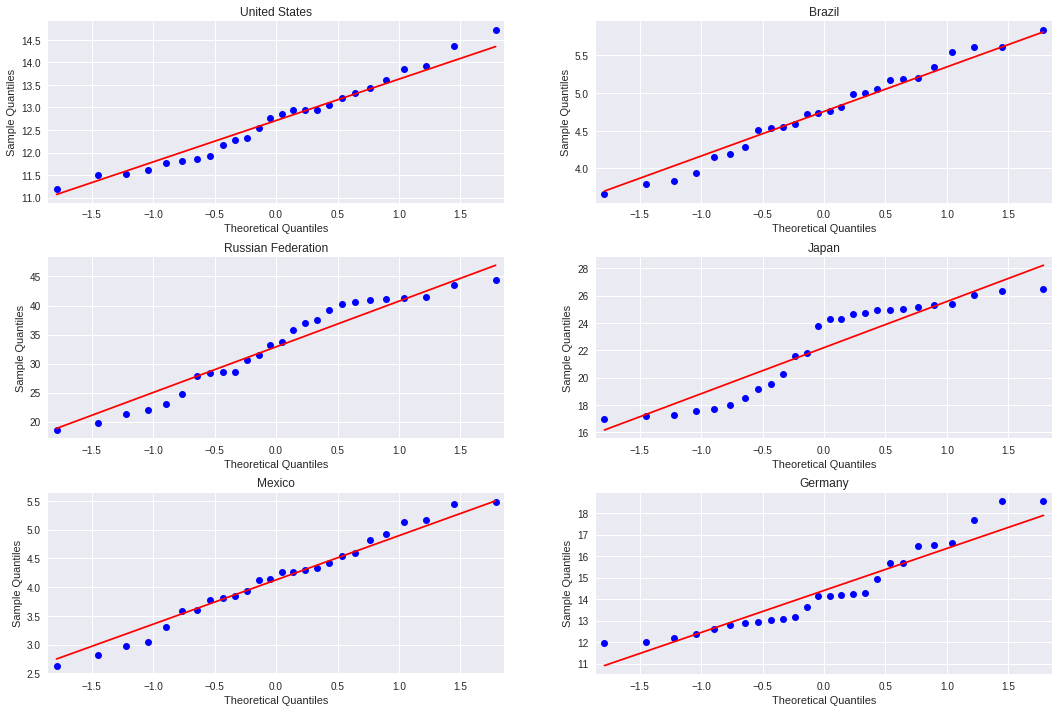

In [17]:
#displaying suicides for each year separately
from scipy.stats import gamma
import statsmodels.api as sm 

plt.style.use('seaborn')
fig,ax = plt.subplots(3,2,figsize=(18,12))
fig.subplots_adjust(hspace=0.3)

for i,x in enumerate(options):
  sm.qqplot(data=df2.loc[df2['country']==x]['net/100k'],ax=ax[i//2][i%2],line='s')
  ax[i//2][i%2].set_title(x)
  #ax[i//2][i%2].set_ylabel()
  #ax[i//2][i%2].set_xlabel('years')

plt.show()

In [18]:
#log likelihood

def gauss_log(x,mean,sigma):
  return 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-(x-mean)**2/(2*sigma**2))

for country in options:
  counter = 1
  #print(df2.loc[df2['country']==country])
  mean = df2.loc[df2['country']==country]['net/100k'].mean()
  sigma = np.sqrt(df2.loc[df2['country']==country]['net/100k'].var())
  for x in df2.loc[df2['country']==country]['net/100k']:
    counter *= gauss_log(x,mean,sigma)
  print('The log likelihood(compared to a gaussian distribution) of net/100k pop for '+country+' is: '+'%.2f'%(np.log(counter)))

The log likelihood(compared to a gaussian distribution) of net/100k pop for United States is: -34.69
The log likelihood(compared to a gaussian distribution) of net/100k pop for Brazil is: -23.25
The log likelihood(compared to a gaussian distribution) of net/100k pop for Russian Federation is: -90.52
The log likelihood(compared to a gaussian distribution) of net/100k pop for Japan is: -68.54
The log likelihood(compared to a gaussian distribution) of net/100k pop for Mexico is: -30.13
The log likelihood(compared to a gaussian distribution) of net/100k pop for Germany is: -54.34


Yes, there is a clear relationship between the log likelihood and the qq plots. The countries for which the qq plot has a straight line(relatively straighter) have a higher log likelihood, whereas in case of deviations the log likelihood decreases.

In [19]:
import scipy.stats as stats
for country in options:
  print('The 95% C.I(Z interval assuming sample variance = variance) for the country '+country+' is:',end=" ")
  sample_mean = df2.loc[df2['country']==country]['net/100k'].mean()
  std = np.sqrt(df2.loc[df2['country']==country]['net/100k'].var())
  n = len(list(df2.loc[df2['country']==country]['year']))
  lower_bound = sample_mean - stats.norm.ppf(0.975)*(std/(np.sqrt(n)))
  upper = sample_mean + stats.norm.ppf(0.975)*(std/(np.sqrt(n)))
  print('['+'%.2f'%(lower_bound)+','+'%.2f'%(upper)+']')

print('*'*100)
for country in options:
  print('The 95% C.I(t interval) for the country '+country+' is:',end=" ")
  sample_mean = df2.loc[df2['country']==country]['net/100k'].mean()
  std = np.sqrt(df2.loc[df2['country']==country]['net/100k'].var())
  n = len(list(df2.loc[df2['country']==country]['year']))
  a= df2.loc[df2['country']==country]['net/100k']
  inter = stats.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=stats.sem(a))
  print('['+'%.2f'%(inter[0])+','+'%.2f'%(inter[1])+']')

The 95% C.I(Z interval assuming sample variance = variance) for the country United States is: [12.35,13.07]
The 95% C.I(Z interval assuming sample variance = variance) for the country Brazil is: [4.52,4.99]
The 95% C.I(Z interval assuming sample variance = variance) for the country Russian Federation is: [29.80,35.97]
The 95% C.I(Z interval assuming sample variance = variance) for the country Japan is: [20.86,23.51]
The 95% C.I(Z interval assuming sample variance = variance) for the country Mexico is: [3.82,4.43]
The 95% C.I(Z interval assuming sample variance = variance) for the country Germany is: [13.64,15.17]
****************************************************************************************************
The 95% C.I(t interval) for the country United States is: [12.33,13.09]
The 95% C.I(t interval) for the country Brazil is: [4.51,5.00]
The 95% C.I(t interval) for the country Russian Federation is: [29.64,36.12]
The 95% C.I(t interval) for the country Japan is: [20.80,23.58]
Th

In [31]:
#Taking germany and united states

sig_level = 0.05
mu1 = df2.loc[df2['country']=='United States']['net/100k'].mean()
mu2 = df2.loc[df2['country']=='Germany']['net/100k'].mean()
s1 = df2.loc[df2['country']=='United States']['net/100k'].var()
s2 = df2.loc[df2['country']=='Germany']['net/100k'].var()
n1 = df2.loc[df2['country']=='United States']['net/100k'].shape[0]
n2 = df2.loc[df2['country']=='Germany']['net/100k'].shape[0]


In [32]:
# Compute t-value
T = (mu1 - mu2) / np.sqrt((s1/n1) + (s2 / n2))

#Compute degrees of freedom
DoF = np.square((s1/n1) + (s2 / n2)) / (((s1/n1)**2)/(n1-1) + ((s2/n2)**2)/(n2-1)) 

In [36]:
# Compare t-value and critical value to decide "Yes" reject null hypothesis

critical_value = stats.t.pdf((1-sig_level)/2,DoF)
print('T : {}, Critical Value : {}'.format(np.abs(T),critical_value))
if np.abs(T) > critical_value:
    print('Null hypothesis is rejected')
    print('YES')
else:
    print('Null hypothesis is not rejected')
    print('NO')

T : 3.9219085632057786, Critical Value : 0.3528902896589511
Null hypothesis is rejected
YES


In [28]:
#Wilcoxon's signed rank test

from scipy.stats import wilcoxon

arr_1  = np.array(df2.loc[df2['country']=='United States']['net/100k'])
arr_2 = np.array(df2.loc[df2['country']=='Germany']['net/100k'])

w,p = wilcoxon(arr_1-arr_2)
print('w = '+str(w)+' p = '+str(p))
accepted_val = 0.05

if p<=accepted_val:
  print('The null hypothesis is rejected')
else:
  print('We do not have enough evidence to reject the null hypothesis')

w = 56.0 p = 0.002404892089595166
The null hypothesis is rejected


We shall find the paired t interval for 95% confidence and in case it doesn't include 0  we can conclude that the two means are actually different.

In [48]:
#note that DoF in this case in n-1s
T = stats.t.pdf((1-sig_level)/2,n1-1)

sd = np.std(arr_1-arr_2)
#note n1 = n2 = 26
t_interval =( (mu1-mu2) - T*sd/np.sqrt(n1),(mu1-mu2) + T*sd/np.sqrt(n1))
print('['+'%.2f'%(t_interval[0]),",",'%.2f'%(t_interval[1])+']')
if t_interval[0]*t_interval[1]>0:
  print('Null hypothesis is rejected')
else:
  print('We do not have enough evidence')

[-1.84 , -1.55]
Null hypothesis is rejected


In [30]:
#part g corelation

df['counter_col'] = np.ones((df.shape[0],1))
print(df['HDI for year'].isna().sum())

19456


Since this value is too high it would,t be right to fill it with means or any other method. So we will compute it separately.

In [21]:
df3 = df.groupby(['country','year']).sum()
#since gdp cannot be summed, we divide it by number of years over which it is summed(athough while calculating corealtion it wouldn't matter)
df3['gdp_per_capita ($)'] = df3['gdp_per_capita ($)']/df3['counter_col']
df3['net/100k'] = df3['suicides_no']/df3['population']*1e5
df3 = df3[['net/100k','gdp_per_capita ($)']]
df3.corr()

,net/100k,gdp_per_capita ($)
net/100k,1.000000,0.060367
gdp_per_capita ($),0.060367,1.000000


Clearly gdp per capita and average rate of suicides doesn't seem to be related as their corelation is only 0.06

In [22]:
df['counter_col'] = np.ones((df.shape[0],1))
df4 = df.dropna(axis=0)
df4 = df4.groupby(['country','year']).sum()
#since HDI cannot be summed, we divide it by number of years over which it is summed(athough while calculating coreltion it wouldn't matter)
df4['HDI for year'] = df4['HDI for year']/df4['counter_col']
df4 = df4[['HDI for year','suicides_no']]
df4.corr()

,HDI for year,suicides_no
HDI for year,1.000000,0.222438
suicides_no,0.222438,1.000000


The corealtion coeffecient is ~0.22 which doesn't show strong corelation, however HDI is relatively more corelated to the suicides_no compared to the gdp per capita. 